## Minimising the Action of a Discrete Path via Gradient Descent

In [18]:
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
import action_functions as funcs

In [94]:
t_a, t_b = [0, 2]
N = 20 # number of time steps
m = 1. # mass
omega = jnp.pi # frequency

t_array = jnp.linspace(t_a, t_b, N)

key = random.PRNGKey(0)

# generate an initial state
x_array = 0.1 * jnp.sin(jnp.pi * t_array)
#x_array = random.uniform(key, shape=(N,))

# boundary conditions
x_array = x_array.at[0].set(0.0)
x_array = x_array.at[-1].set(0.0)

potential = lambda x: funcs.harmonic_potential(x, m=m, omega=omega)
action_fn = lambda x: funcs.action(x, t_a, t_b, N=N, potential=potential)

print(f"Initial action: {action_fn(x_array)}")

Initial action: -0.0004480794887058437


In [95]:
x, action_array, grad_array = funcs.gradient_descent(action_fn, x_array, learning_rate=0.001, steps=10000)

Step 0, action: -0.000448, grad_norm: 0.436244
Step 100, action: -0.000394, grad_norm: 0.442260
Step 200, action: -0.000394, grad_norm: 0.442262
Step 300, action: -0.000394, grad_norm: 0.442264
Step 400, action: -0.000394, grad_norm: 0.442266
Step 500, action: -0.000394, grad_norm: 0.442268
Step 600, action: -0.000394, grad_norm: 0.442270
Step 700, action: -0.000394, grad_norm: 0.442272
Step 800, action: -0.000394, grad_norm: 0.442274
Step 900, action: -0.000394, grad_norm: 0.442276
Step 1000, action: -0.000394, grad_norm: 0.442278
Step 1100, action: -0.000394, grad_norm: 0.442280
Step 1200, action: -0.000394, grad_norm: 0.442282
Step 1300, action: -0.000394, grad_norm: 0.442284
Step 1400, action: -0.000394, grad_norm: 0.442286
Step 1500, action: -0.000394, grad_norm: 0.442288
Step 1600, action: -0.000394, grad_norm: 0.442290
Step 1700, action: -0.000394, grad_norm: 0.442292
Step 1800, action: -0.000394, grad_norm: 0.442294
Step 1900, action: -0.000395, grad_norm: 0.442297
Step 2000, a

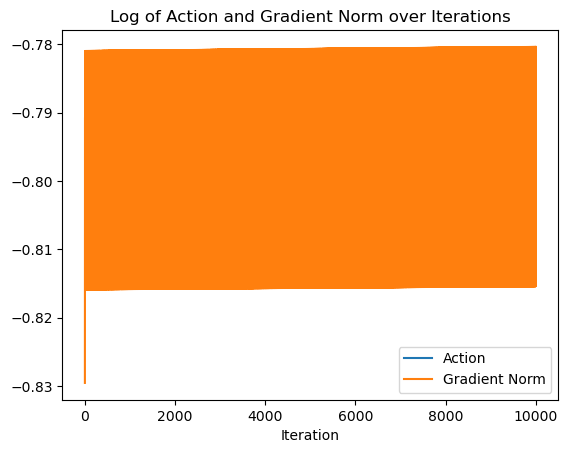

In [96]:
iter_array = jnp.arange(len(action_array))

plt.plot(iter_array, jnp.log(action_array), label='Action')
plt.plot(iter_array, jnp.log(grad_array), label='Gradient Norm')
plt.title('Log of Action and Gradient Norm over Iterations')
plt.xlabel('Iteration')
plt.legend(loc='best')
plt.show()

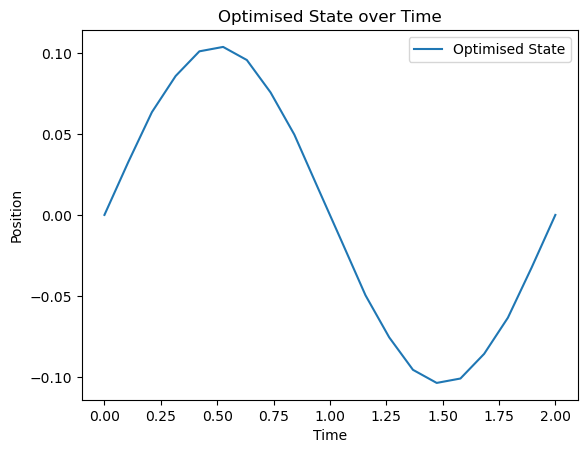

In [97]:
plt.plot(t_array, x, label='Optimised State')
plt.title('Optimised State over Time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(loc='best')
plt.show()